In [3]:
from delay_simulate import delay_simulate
a = [1,2,3,4,5]
delay_simulate(a,[0,0,0])

[0, 0, 0, 1, 2]

In [3]:
sumo = [
    463.82999999999987,
    3095.0900000000015,
    8516.970000000008,
    15372.829999999989,
    22739.31,
    30412.759999999984,
    38375.489999999976,
    46883.25999999996,
    56073.74000000006,
    66317.75,
    77790.61999999998,
    90090.64999999979,
]
ctm = [
    0.0,
    1566.9755554199219,
    3553.5992431640625,
    5548.0322265625,
    7550.2734375,
    9560.321044921875,
    11578.17626953125,
    13605.44189453125,
    15630.1953125,
    17667.0458984375,
    19715.98876953125,
    21777.54638671875,
]
time0 = [100 * i for i in range(1, 13)]

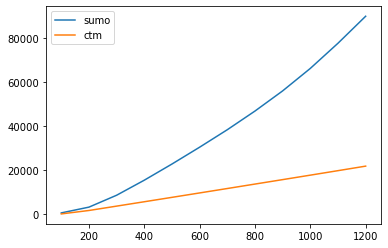

In [4]:
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()

(0.0, 1500.0)

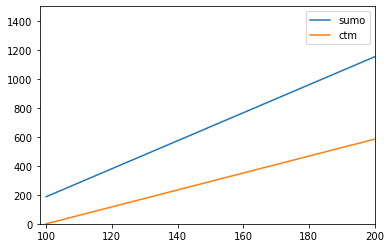

In [7]:
sumo = [
    187.07000000000002,
    1151.69,
    2722.0499999999997,
    4233.550000000001,
    5703.540000000001,
    7098.260000000005,
    8644.950000000003,
    10312.000000000007,
    11952.940000000006,
    13652.990000000013,
    15306.520000000002,
    16917.45,
]
ctm = [
    0.0,
    583.7839126586914,
    1323.2315063476562,
    2065.5908203125,
    2810.8621215820312,
    3559.0469360351562,
    4310.143737792969,
    5064.751892089844,
    5818.548583984375,
    6576.85791015625,
    7339.677734375,
    8107.20947265625,
]
time0 = [100 * i for i in range(1, 13)]
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()
plt.xlim(98, 200)
plt.ylim(0, 1500)

[2356.2838397060336, 4180.349160484525, 5959.330998854161, 7839.29353681489, 9789.597360150383, 11706.467118891076, 13503.935196299504, 15538.313055574912, 17622.145519337675, 19361.14799176124]


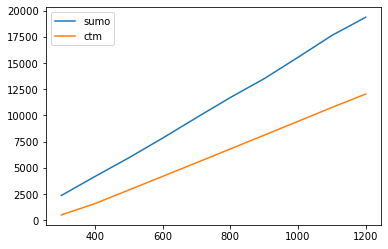

In [42]:
og_sumo = [
    181.0285002020941,
    1368.5810924092925,
    2356.2838397060336,
    1824.065320778491,
    1778.9818383696368,
    1879.9625379607292,
    1950.3038233354937,
    1916.8697587406937,
    1797.4680774084275,
    2034.377859275408,
    2083.8324637627643,
    1739.0024724235668,
]
ctm = [
    506.6415786743164,
    1591.7808532714844,
    2886.9924926757812,
    4186.71630859375,
    5490.9454345703125,
    6799.678955078125,
    8112.9254150390625,
    9430.68359375,
    10753.155517578125,
    12034.29443359375,
]
sumo = og_sumo[2:]
temp = sumo[0]
for i in range(1,len(sumo)):
    sumo[i] += temp
    temp = sumo[i]
print(sumo)
time0 = [100 * i for i in range(3, 13)]
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()


Text(0, 0.5, 'sumo')

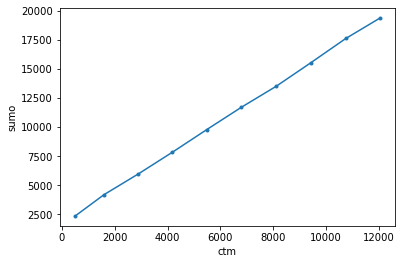

In [43]:
plt.plot(ctm, sumo, marker='.')
plt.xlabel('ctm')
plt.ylabel('sumo')

           ctm      sumo
ctm   1.000000  0.999903
sumo  0.999903  1.000000


<AxesSubplot:>

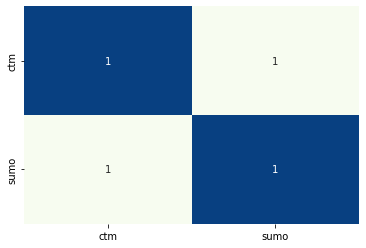

In [32]:
import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm':ctm, 'sumo':sumo})
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)

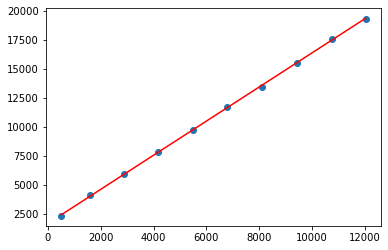

In [40]:
import numpy as np

ctm = np.array(ctm).reshape((-1, 1))
sumo = np.array(sumo)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 训练模型
model.fit(ctm, sumo)

# 计算预测值
y_pred = model.predict(ctm)

# 绘制原始数据和拟合直线
plt.scatter(ctm, sumo)
plt.plot(ctm, y_pred, color='red')
plt.show()

In [41]:
print(model.coef_, model.intercept_)

[1.46905752] 1707.8195921444476


重写了新的延误读取

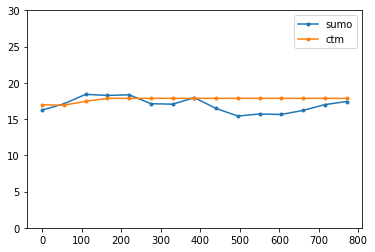

In [1]:
og_sumo=[2.8540945620690583, 4.922126994261095, 10.034460464171017, 15.167019053808257, 17.756409122180855, 17.768167018331976, 17.549891115619065, 18.218071958368714, 17.890610537660436, 17.48760503602711, 16.25043118547531, 17.100962357423022, 18.41587105436694, 18.26050827913568, 18.34927656458144, 17.125934996538827, 17.053663043366473, 17.95598676563732, 16.46441114230664, 15.421931852573831, 15.69890882239517, 15.637147325571673, 16.195811380771058, 16.99268030471304, 17.423607612665993]
og_ctm= [16.967024075782906, 16.918937553793693, 17.45743832345736, 17.859343189304155, 17.85934512898073, 17.85934124962758, 17.85934512898073, 17.859347068657307, 17.859349008333883, 17.859352887687038, 17.859358706716762, 17.859362586069913, 17.859362586069913, 17.85936452574649, 17.859370344776217]
og_sumo = og_sumo[10:]
time0 = [55 * i for i in range(15)]

from matplotlib import pyplot as plt
plt.plot(time0, og_sumo, label="sumo", marker='.')
plt.plot(time0, og_ctm, label="ctm", marker='.')
plt.legend()
plt.ylim(0, 30)
plt.show()

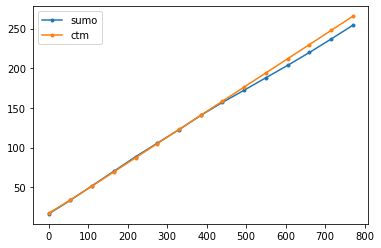

In [30]:
sumo_delay = [16.25043118547531, 33.351393542898336, 51.767264597265275, 70.02777287640096, 88.3770494409824, 105.50298443752123, 122.5566474808877, 140.512634246525, 156.97704538883164, 172.39897724140548, 188.09788606380064, 203.73503338937232, 219.93084477014338, 236.92352507485643, 254.34713268752242]
ctm_delay = [16.967024075782906, 33.8859616295766, 51.34339995303396, 69.20274314233811, 87.06208827131884, 104.92142952094642, 122.78077464992715, 140.64012171858445, 158.49947072691833, 176.35882361460537, 194.21818232132213, 212.07754490739205, 229.93690749346197, 247.79627201920846, 265.65564236398467]

plt.plot(time0, sumo_delay, label="sumo", marker='.')
plt.plot(time0, ctm_delay, label="ctm", marker='.')
plt.legend()
# plt.ylim(0, 30)
plt.show()

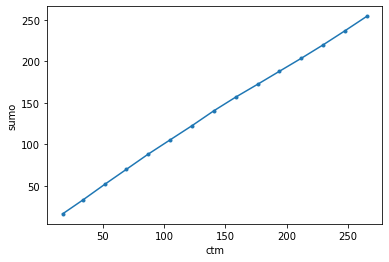

           ctm      sumo
ctm   1.000000  0.999583
sumo  0.999583  1.000000


<AxesSubplot:>

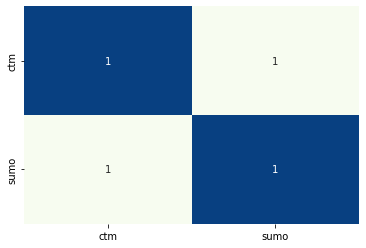

In [31]:

plt.plot(ctm_delay, sumo_delay, marker='.')
plt.xlabel('ctm')
plt.ylabel('sumo')
plt.show()

import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm'=ctm_delay, 'sumo':sumo_delay})
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)



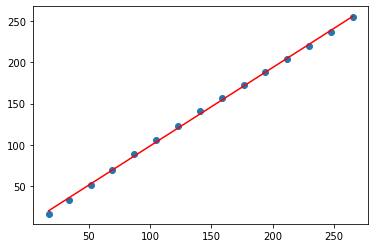

[0.94828] 3.9072713550844753


In [32]:
import numpy as np
ctm_delay = np.array(ctm_delay).reshape((-1, 1))
sumo_delay = np.array(sumo_delay)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 训练模型
model.fit(ctm_delay, sumo_delay)
# 计算预测值
y_pred = model.predict(ctm_delay)
# 绘制原始数据和拟合直线
plt.scatter(ctm_delay, sumo_delay)
plt.plot(ctm_delay, y_pred, color='red')
plt.show()
print(model.coef_, model.intercept_)


In [1]:
from webster import phase4webster
duration = phase4webster(
    [400, 400, 200, 200],
    fix=36
)
duration

[20, 6, 10, 4]

In [35]:
import traci
traci.start(
    [
        "sumo",
        "-c",
        "./SUMO_Input/Test4.sumocfg",
        "--statistic-output",
        "SUMO_Output/statistic.xml",
        "--duration-log.statistics",
        "--tripinfo-output.write-unfinished",
    ]
)

(20, 'SUMO 1.16.0')

第15周期990s需求突变 4422-2244

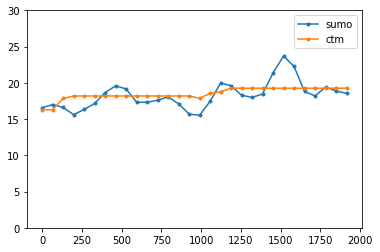

In [3]:
og_sumo = [2.8540945620690583, 4.886455319299999, 9.98096041495164, 16.490363848027982, 18.923575692522274, 17.42646964699685, 16.600550812723792, 16.581224196920374, 15.248393472984743, 15.777251217006567, 16.573390706213235, 17.00309197261963, 16.601543772739383, 15.605059358424501, 16.330095912795162, 17.160413675535146, 18.6627961167922, 19.585176817870526, 19.161820700330097, 17.323310955701153, 17.313060550830567, 17.605273900419252, 18.0578313273065, 17.111691199476123, 15.693006503562387, 15.52203194597332, 17.447637511926953, 19.96571848422064, 19.609089315297133, 18.28386543632008, 17.992517955887664, 18.46092587638948, 21.36206482904716, 23.703086139456303, 22.258213659669178, 18.80685086826823, 18.199315514371314, 19.414543391979844, 18.882449009972024, 18.553164093803257]
og_ctm = [16.28636634955972, 16.29087027856859, 17.84740254030389, 18.185839248915848, 18.185835369562696, 18.185829550532972, 18.185827610856393, 18.18582373150324, 18.18581985215009, 18.18581597279694, 18.185812093443786, 18.18580239506091, 18.185798515707756, 18.185794636354604, 18.185790757001456, 17.87175324003575, 18.53479482359805, 18.773167497020655, 19.261298745365462, 19.261294866012314, 19.261290986659162, 19.26128516762943, 19.261279348599707, 19.261275469246556, 19.261267710540253, 19.2612638311871, 19.261258012157377, 19.261256072480798, 19.26125025345107, 19.26124637409792]
sumo_delay = [16.573390706213235, 33.57648267883286, 50.178026451572244, 65.78308580999675, 82.11318172279191, 99.27359539832705, 117.93639151511925, 137.52156833298977, 156.68338903331988, 174.00669998902103, 191.3197605398516, 208.92503444027085, 226.98286576757735, 244.09455696705348, 259.78756347061585, 275.30959541658916, 292.7572329285161, 312.72295141273673, 332.33204072803386, 350.61590616435393, 368.6084241202416, 387.06934999663105, 408.4314148256782, 432.1345009651345, 454.3927146248037, 473.19956549307193, 491.39888100744326, 510.8134243994231, 529.6958734093952, 548.2490375031985]
ctm_delay = [16.28636634955972, 32.57723662812831, 50.4246391684322, 68.61047841734805, 86.79631378691074, 104.98214333744372, 123.16797094830011, 141.35379467980334, 159.53961453195342, 177.72543050475036, 195.91124259819415, 214.09704499325505, 232.2828435089628, 250.4686381453174, 268.65442890231884, 286.52618214235457, 305.06097696595265, 323.8341444629733, 343.0954432083388, 362.3567380743511, 381.61802906101025, 400.87931422863966, 420.1405935772394, 439.4018690464859, 458.66313675702617, 477.92440058821325, 497.18565860037063, 516.4469146728514, 535.7081649263025, 554.9694113004005]
og_sumo = og_sumo[10:]
time0 = [66 * i for i in range(30)]

from matplotlib import pyplot as plt
plt.plot(time0, og_sumo, label="sumo", marker='.')
plt.plot(time0, og_ctm, label="ctm", marker='.')
plt.legend()
plt.ylim(0, 30)
plt.show()

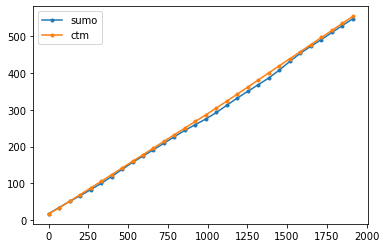

In [4]:
plt.plot(time0, sumo_delay, label="sumo", marker='.')
plt.plot(time0, ctm_delay, label="ctm", marker='.')
plt.legend()
# plt.ylim(0, 30)
plt.show()

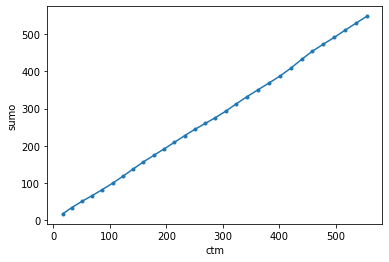

           ctm      sumo
ctm   1.000000  0.999787
sumo  0.999787  1.000000


<AxesSubplot:>

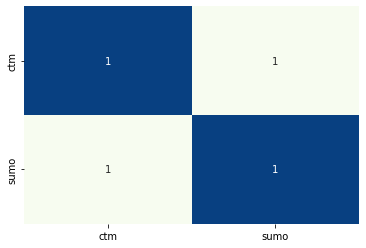

In [5]:
plt.plot(ctm_delay, sumo_delay, marker='.')
plt.xlabel('ctm')
plt.ylabel('sumo')
plt.show()

import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm':ctm_delay, 'sumo':sumo_delay})
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)

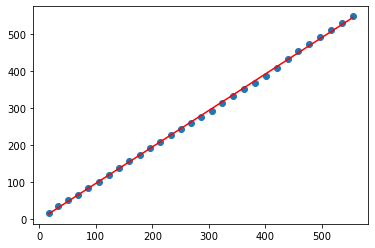

[0.98685904] -2.782261897697879


In [6]:
import numpy as np
ctm_delay = np.array(ctm_delay).reshape((-1, 1))
sumo_delay = np.array(sumo_delay)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 训练模型
model.fit(ctm_delay, sumo_delay)
# 计算预测值
y_pred = model.predict(ctm_delay)
# 绘制原始数据和拟合直线
plt.scatter(ctm_delay, sumo_delay)
plt.plot(ctm_delay, y_pred, color='red')
plt.show()
print(model.coef_, model.intercept_)

# 问题6

cellscale=1

In [4]:
# og_sumo = [2.8540945620690583, 4.886455319299999, 9.98096041495164, 16.490363848027982, 18.923575692522274, 17.42646964699685, 16.600550812723792, 16.581224196920374, 15.248393472984743, 15.777251217006567, 16.74176097553024, 18.48329427712147, 20.508188594079876, 21.10814345535728, 17.715468656076627, 19.699704863656397, 22.29785635622179, 20.53943138855051, 19.960037077945415, 20.304380929324527, 20.01563683687335, 21.71495214868506, 20.533990487934464, 17.177042741535065, 17.759143853307705, 19.688593533174615, 20.294517341612803, 19.659469676630238, 21.324455301777427, 21.148236288620094, 20.354111874277685, 19.933151541755493, 18.631302278165315, 18.11383430062201, 17.48412265086675, 17.870790606697387, 18.50063056315634, 19.872626221033865, 19.591399663650268, 20.042915067291165]
# og_ctm =  [19.243785859616278, 27.313413077773877, 23.183788996586635, 17.94999876040056, 12.712632553100564, 24.55306912343642, 23.243515638363796, 14.075916664950936, 19.220988335310285, 14.066527532659878, 17.685957558283068, 27.140466125384172, 15.24104481456044, 15.212139492540425, 19.703646560214523, 28.528886503660484, 22.730786211567512, 18.085497926362525, 32.46930632276348, 33.52284990377064, 28.57231536865229, 17.04388330859587, 14.535530848672904, 18.115762504117523, 17.7800994044481, 16.416798081989896, 22.580921607448637, 16.056057774582186, 18.804058261530667, 16.151092060010516]
import numpy as np


og_sumo=[2.870641503994558, 4.722451279676341, 9.10568854693246, 14.363536721781415, 16.428381512742757, 15.973040238236601, 16.008644223453008, 17.53520735341538, 18.217913087467167, 17.237859824831848, 14.970587641018383, 15.107399167220942, 16.414408537068642, 17.526857706702277, 17.574816034016127, 17.779881219198636, 17.837235520739846, 18.562874738989716, 18.92843162449957, 17.89145539485271, 17.190102790914334, 17.509430419208773, 17.423635677835644, 17.318128512311638, 17.075377455899893, 17.157402227938103]
og_ctm= [7.34396316358678, 8.011662516817061, 6.428804430799412, 12.308209194654689, 10.728328551023585, 14.795971908616622, 9.748450011384465, 12.68952205730122, 8.759451579130257, 9.58138187719662, 9.561896780129764, 12.818431597002718, 6.8304459840496925, 11.565219075355671, 10.47440730200383, 8.680506236736585]
# [658, 723, 802, 870, 950, 1015, 1084, 1163, 1228, 1307, 1381, 1452, 1529, 1612, 1689, 1781, 1843, 1922, 1997, 2064, 2135, 2203, 2276, 2347, 2421, 2486, 2559, 2629, 2706, 2782]
sumo_delay = og_sumo[10:]

ctm_delay = [(_ + (np.mean(og_ctm) - _)*0.6 ) for _ in og_ctm]
coeff = np.mean(sumo_delay) / np.mean(ctm_delay)
ctm_delay = [_ * coeff for _ in ctm_delay]


# ctm_delay = og_ctm
# import numpy as np

import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm':ctm_delay, 'sumo':sumo_delay})
time0 = list(range(len(ctm_delay)))
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
# og_sumo=[2.870641503994558, 4.722451279676341, 9.10568854693246, 14.363536721781415, 16.428381512742757, 15.973040238236601, 16.008644223453008, 17.53520735341538, 18.217913087467167, 17.237859824831848, 14.970587641018383, 15.107399167220942, 16.414408537068642, 17.526857706702277, 17.574816034016127, 17.779881219198636, 17.837235520739846, 18.562874738989716, 18.92843162449957, 17.89145539485271, 17.190102790914334, 17.509430419208773, 17.423635677835644, 17.318128512311638, 17.075377455899893, 17.157402227938103]
# og_ctm= [7.34396316358678, 8.011662516817061, 6.428804430799412, 12.308209194654689, 10.728328551023585, 14.795971908616622, 9.748450011384465, 12.68952205730122, 8.759451579130257, 9.58138187719662, 9.561896780129764, 12.818431597002718, 6.8304459840496925, 11.565219075355671, 10.47440730200383, 8.680506236736585]
# time0 = list(range(len(ctm_delay)))
# coeff = np.mean(og_sumo) / np.mean(og_ctm)
# ctm_delay = [(_ + (np.mean(og_ctm) - _)*0.8 )*coeff for _ in og_ctm]
# ctm_delay = og_ctm
# sumo_delay = og_sumo[10:]

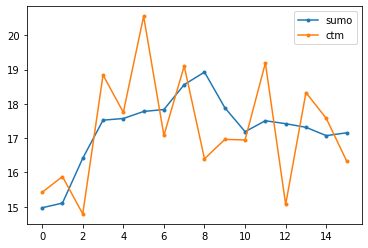

In [74]:
plt.plot(time0, sumo_delay, label="sumo", marker=".")
plt.plot(time0, ctm_delay, label="ctm", marker=".")
plt.legend()
# plt.ylim(0, 30)
plt.show()

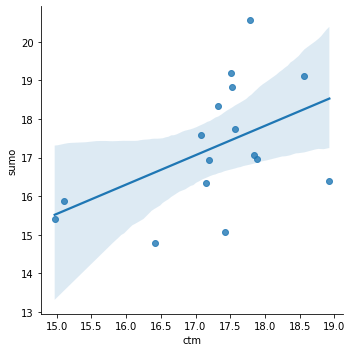

In [75]:
sns.lmplot(
    data = resultdf,
    x='sumo',
    y='ctm',
    order=1
)
plt.xlabel('ctm')
plt.ylabel('sumo')
plt.show()

           ctm      sumo
ctm   1.000000  0.487118
sumo  0.487118  1.000000


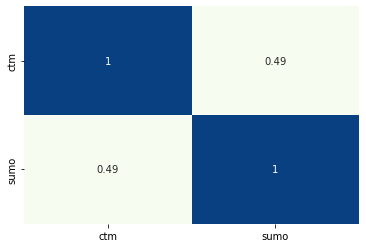

           ctm      sumo
ctm   2.667531  0.831507
sumo  0.831507  1.092330


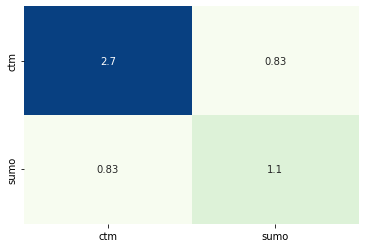

In [76]:
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
plt.show()
cov = resultdf.cov()
print(cov)
sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
plt.show()


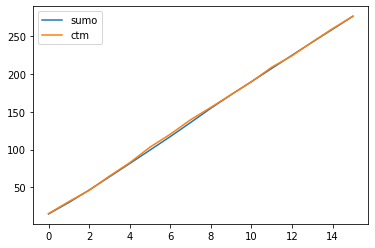

In [77]:
temp = sumo_delay[0]
for i in range(1, len(sumo_delay)):
    sumo_delay[i] += temp
    temp = sumo_delay[i]

temp = ctm_delay[0]
for i in range(1, len(ctm_delay)):
    ctm_delay[i] += temp
    temp = ctm_delay[i]
    
plt.plot(time0, sumo_delay, label="sumo")
plt.plot(time0, ctm_delay, label="ctm")
plt.legend()
plt.show()

cellscale=2

# 分析ctm延误成因, 以及合适的ctm/sumo指标计算方式

从结论来看，sumo和og_ctm的关联性比较好

In [97]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sumo=[4.916436687313045, 4.32464819402042, 4.585994411170272, 4.918053251757599, 5.698892098106941, 5.460721909797618, 5.505356067066772, 4.618916082596014, 6.734249471826392, 6.855095817314461, 5.962608474698871, 5.251203763224334, 5.794156514867605, 5.797102305486308, 5.57793233370376, 5.213151859416871, 5.453349688430824, 6.228130087856089, 4.485736253290264, 5.5534046279251905, 4.240715622285456, 4.734758255283934, 5.141407725113381, 5.341307160555415]
ctm= [9.890155068999727, 6.496809892099463, 8.872473416291239, 11.504410196376343, 10.27919971595073, 9.762066177062879, 10.298889826241432, 8.07272792255917, 12.543075194786754, 17.06301511658245, 12.330742882894489, 5.9565862061437285, 8.688287689006987, 13.108097308878415, 15.182816885656301, 9.69327308247829, 12.198046210776162, 10.270128952649584, 8.23792876692869, 7.8996628772305675, 9.95808620704842, 9.562340783672486, 14.288669827525235, 15.22067986135913]
og_ctm_delay= [444.4537353515625, 281.48767471313477, 414.7650909423828, 455.313720703125, 499.85240936279297, 438.1914520263672, 469.8202133178711, 322.7828598022461, 617.4297714233398, 818.3271026611328, 546.2598037719727, 283.0583190917969, 406.00963592529297, 644.7670745849609, 701.8075561523438, 426.26644134521484, 562.6451110839844, 481.8013381958008, 410.37879943847656, 372.9133605957031, 372.38250732421875, 443.71997833251953, 573.1111145019531, 709.1233062744141]
sum_cur_demand= [1367.9252444690255, 1363.00832350784, 1403.8746763736583, 1264.4512712029605, 1444.0620998719587, 1370.5762534741434, 1362.983161872103, 1271.7563167254164, 1464.7664953665708, 1417.7533665247545, 1365.9733358166127, 1424.2563812871674, 1378.3806407520863, 1430.399370667693, 1405.7502621950393, 1356.3081163941602, 1404.1096697847124, 1389.028014210023, 1449.565925348687, 1418.8910705634312, 1232.2195682547303, 1390.961894693191, 1290.2944759189731, 1397.0688523056097]
sum_step_veh= [3.90124839948784, 3.9512644046094847, 3.8512323943662023, 3.751200384122921, 3.701184379001288, 3.7698750187816126, 3.9718221608538307, 3.9512644046094754, 3.6542392606763907, 3.8512323943662063, 4.0803141943176655, 4.00128040973112, 3.8477318174364274, 3.892476452462252, 4.051296414852757, 4.039751826031716, 4.002548533543422, 3.6986761899495293, 3.9128532439137533, 3.851232394366209, 3.8512323943661957, 3.9012483994878364, 3.5511363636363744, 3.901248399487839]
ctm_avg_delay= [0.08484898507595062, 0.05671721324324608, 0.07716905325651169, 0.09763666987419128, 0.09115700423717499, 0.08441130816936493, 0.088243268430233, 0.06754881888628006, 0.11251161992549896, 0.1422356218099594, 0.10575391352176666, 0.05196365714073181, 0.07480162382125854, 0.11282212287187576, 0.12916575372219086, 0.08297894150018692, 0.10616745054721832, 0.08782222867012024, 0.07203459739685059, 0.06944573670625687, 0.08393315225839615, 0.08353441208600998, 0.12349621951580048, 0.12912854552268982]
time0 = list(range(len(ctm)))


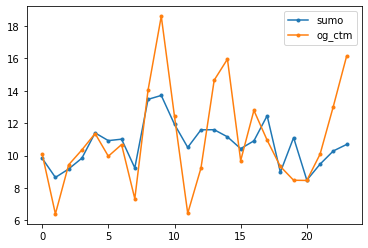

In [106]:
plt.plot(time0, [_ * 2 for _ in sumo], label="sumo", marker=".")
plt.plot(time0, [_ / 44 for _ in og_ctm_delay], label="og_ctm", marker=".")

plt.legend()
# plt.ylim(0, 30)
plt.show()

In [49]:
# og_sumo = og_sumo[10:]
# sum_step_veh = [sum_cur_demand[i] for i in range(1, len(sum_cur_demand), 2)]
# sum_cur_demand = [sum_cur_demand[i] for i in range(0, len(sum_cur_demand), 2)]

In [71]:
maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    'og_ctm':og_ctm_delay,
    'sum_step_veh':sum_step_veh,
    'sum_cur_demand':sum_cur_demand,
    'ctm_avg_delay':ctm_avg_delay
})

                    sumo       ctm    og_ctm  sum_step_veh  sum_cur_demand  \
sumo            1.000000  0.544839  0.655398     -0.213243        0.503597   
ctm             0.544839  1.000000  0.965318     -0.161515        0.064902   
og_ctm          0.655398  0.965318  1.000000     -0.120227        0.311762   
sum_step_veh   -0.213243 -0.161515 -0.120227      1.000000        0.071994   
sum_cur_demand  0.503597  0.064902  0.311762      0.071994        1.000000   
ctm_avg_delay   0.560721  0.997560  0.969618     -0.188141        0.101475   

                ctm_avg_delay  
sumo                 0.560721  
ctm                  0.997560  
og_ctm               0.969618  
sum_step_veh        -0.188141  
sum_cur_demand       0.101475  
ctm_avg_delay        1.000000  


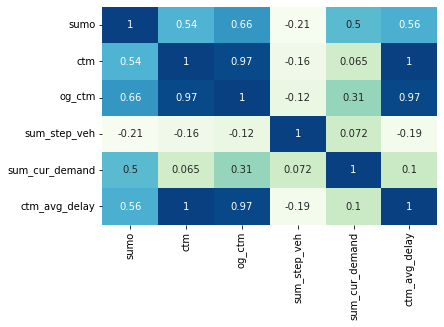

                     sumo         ctm        og_ctm  sum_step_veh  \
sumo             0.476492    1.057688     61.833743     -0.019449   
ctm              1.057688    7.909025    371.043160     -0.060018   
og_ctm          61.833743  371.043160  18680.364726     -2.171204   
sum_step_veh    -0.019449   -0.060018     -2.171204      0.017459   
sum_cur_demand  20.790839   10.916389   2548.456238      0.568932   
ctm_avg_delay    0.009123    0.066122      3.123500     -0.000586   

                sum_cur_demand  ctm_avg_delay  
sumo                 20.790839       0.009123  
ctm                  10.916389       0.066122  
og_ctm             2548.456238       3.123500  
sum_step_veh          0.568932      -0.000586  
sum_cur_demand     3577.025823       0.143044  
ctm_avg_delay         0.143044       0.000556  


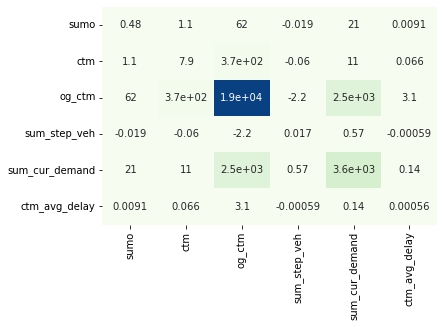

In [84]:
corr = maindf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
plt.show()
cov = maindf.cov()
print(cov)
sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
plt.show()


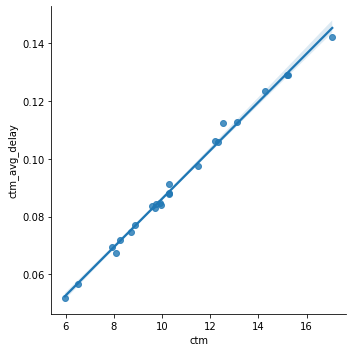

In [76]:
sns.lmplot(
    data = maindf,
    x='ctm',
    y='ctm_avg_delay',
    order=1
)
plt.show()

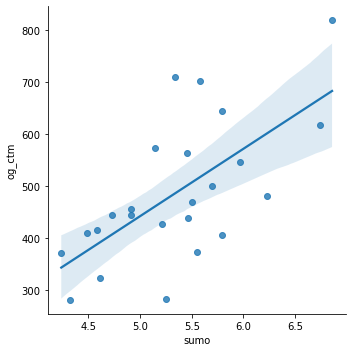

In [85]:
sns.lmplot(
    data = maindf,
    x='sumo',
    y='og_ctm',
    order=1
)
plt.show()
# this looks good

Text(0.5, 1.0, 'ctm delay reasoning')

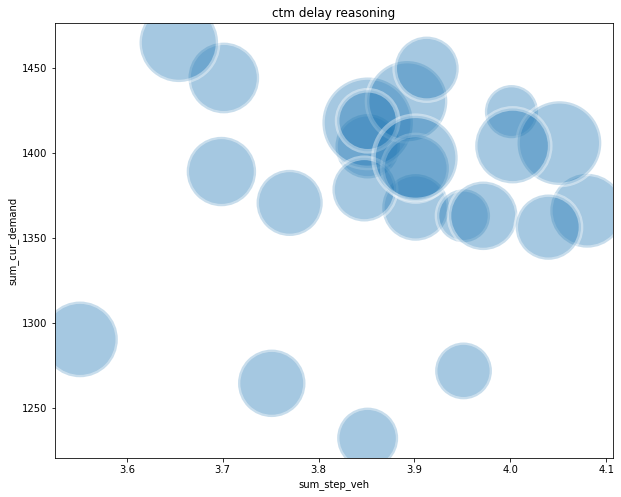

In [87]:
plt.figure(figsize = [10,8])
sns.scatterplot(
    data = maindf,
    x = 'sum_step_veh',
    y = 'sum_cur_demand',
    s = maindf['og_ctm']*10,
    alpha = 0.4,
    # hue = '平均剔除率',
    palette = 'rainbow',
)
plt.title('ctm delay reasoning')

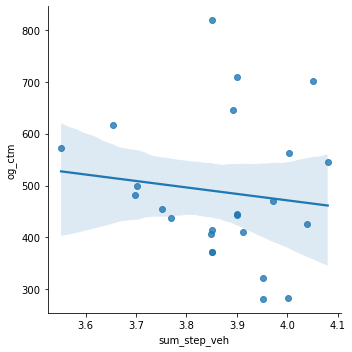

In [89]:
sns.lmplot(
    data = maindf,
    x='sum_step_veh',
    y='og_ctm',
    order=1
)
plt.show()

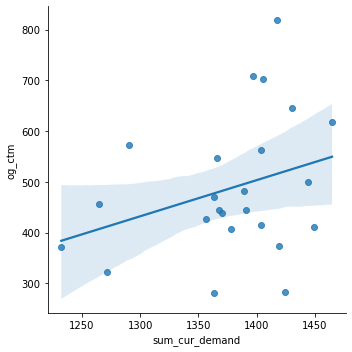

In [90]:
sns.lmplot(
    data = maindf,
    x='sum_cur_demand',
    y='og_ctm',
    order=1
)
plt.show()